In [2]:
with open("s2_shared_path.txt", "r") as f:
    s2_path = f.read().strip()

🐍 Python: 1.587 seg | mean = 3766.624630


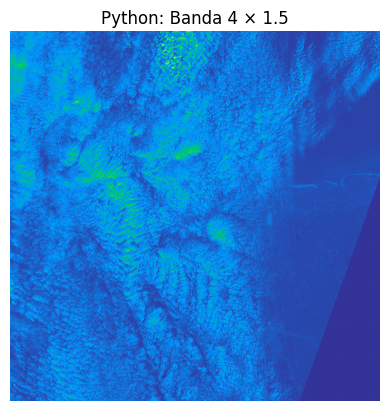

In [3]:
# Código en Python
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import time
import gc

# ------------------------------------------------
# 1. Leer ruta compartida
# ------------------------------------------------
with open("s2_shared_path.txt", "r") as f:
    s2_path = f.read().strip()

# ------------------------------------------------
# 2. WARM-UP (compila + cachea)
# ------------------------------------------------
with rasterio.open(s2_path) as src:
    _ = (src.read(1) * 1.5).mean()

gc.collect()

# ------------------------------------------------
# 3. BENCHMARK REAL
# ------------------------------------------------
t0 = time.perf_counter()

with rasterio.open(s2_path) as src:
    b4 = src.read(1)          # lectura banda 4
    res = b4 * 1.5            # operación
    m_py = res.mean()         # FORZADO REAL

t_python = time.perf_counter() - t0

print(f"🐍 Python: {t_python:.3f} seg | mean = {m_py:.6f}")

# ------------------------------------------------
# 4. Plot (FUERA DEL BENCHMARK)
# ------------------------------------------------
plt.imshow(res, cmap="terrain")
plt.title("Python: Banda 4 × 1.5")
plt.axis("off")
plt.show()

# ------------------------------------------------
# 5. Limpieza
# ------------------------------------------------
del b4, res
#gc.collect()